# Demo No. 5 - Pulsations  - WIP, do NOT use

This package models stellar pulsations as a perturbations of stellar surface in form of spherical harmonics. The package models deformation of the surface geometry and perturbations in surface effective temperature distribution as well. This demo will demonstrate how to model pulsation modes on the surface of star.

In [3]:
%matplotlib notebook
from astropy import units as u

from elisa.binary_system.system import BinarySystem
from elisa.base.star import Star

from elisa import units as eu

## Generating the pulsation metadata

Pulsations modes itself are defined similarly as spots in previous demo:   

In [5]:
pulsations_meta = [
        {
            'l': 5,
            'm': 5,
            'amplitude': 3000 * u.m/u.s,
            'frequency': 15 / u.d,
            'start_phase': 0.2,
            'mode_axis_theta': 15 * u.deg,
            'mode_axis_phi': 90 * u.deg,
        },
#         {
#             'l': 5,
#             'm': -5,
#             'amplitude': 3000 * u.m/u.s,
#             'frequency': 15 / u.d,
#             'start_phase': 0.2,
#             'mode_axis_theta': 30*u.deg,
#             'mode_axis_phi': 0*u.deg,
#         },
    ]

Each pulsation mode is defined by the angular degree `l`, azimuthal order `m`, radial amplitude of the effective temperature perturbation `amplitude`, mode frequency `frequency`and `start_phase` of the given mode at photometric phase 0.
In case of the missalligned mode, where the mode axis is not parallel with axis of rotation, mode axis can be defined by the angular spherical coordinates of the mode axis at photometric phase 0 using parameters `mode_axis_theta` and `mode_axis_phi`.

## Generating a binary system

Pulsation mode data are also passed to the binary system component in the form of the keyword argument `pulsations`:

In [6]:
primary = Star(
    mass=2.15 * u.solMass,
    surface_potential=5.0,
    synchronicity=1.0,
    t_eff=10000 * u.K,
    gravity_darkening=1.0,
    discretization_factor=3, 
    albedo=0.6,
    metallicity=0.0,
    pulsations = pulsations_meta  # here we declared the pulsation modes on the primary component
)

secondary = Star(
    mass=1.2 * u.solMass,
    surface_potential=7.0,
    synchronicity=1.0,
    t_eff=7000 * u.K,
    gravity_darkening=1.0,
    # discretization_factor=20,
    albedo=0.6,
    metallicity=0,  # similarly, pulsation modes can be added to the secondary component as well
)

bs = BinarySystem(
    primary=primary,
    secondary=secondary,
    argument_of_periastron=58 * u.deg,
    gamma=-30.7 * u.km / u.s,
    period=10 * u.d,
    eccentricity=0.2,
    inclination=85 * u.deg,
    primary_minimum_time=2440000.0 * u.d,
    phase_shift=0.0,
)

2020-05-28 15:01:17,141 - 28998 - pulse.mode - INFO: initialising object PulsationMode


IndexError: tuple index out of range

## Accessing the basic properties of a PulsationMode

Each of the pulsational modes defined in `pulsations_meta` are now stored along with its index in a dictionary as a separate objects within our pulsating component which can be accessed here: 

In [6]:
bs.primary.pulsations

{0: <elisa.pulse.mode.PulsationMode at 0x7f6b41efa3c8>}

Each parameter of given pulsation mode is stored as an atribute of `PulsationMode` object. Parameters `mode_axis_theta`, `mode_axis_phi`, `start_phase` and `temperature_perturbation_phase_shift` are optional and they have their default fallback values:

In [7]:
pm = bs.primary.pulsations[0]

print('Parameters of the pulsation mode: \n'
      f'l = {pm.l}, m = {pm.m}, \n'
      f'amplitude = {pm.amplitude * eu.VELOCITY_UNIT}, frequency = {pm.frequency * eu.FREQUENCY_UNIT:.3},\n' 
      f'mode_axis_theta = {pm.mode_axis_theta:.3}, mode_axis_phi = {pm.mode_axis_phi:.3}, \n'
      f'temperature_perturbation_phase_shift = {pm.temperature_perturbation_phase_shift:.3}, \n'
      f'start_phase = {pm.start_phase:.3}')

Parameters of the pulsation mode: 
l = 5, m = 5, 
amplitude = 3000.0 m / s, frequency = 0.000174 Hz,
mode_axis_theta = 0.262, mode_axis_phi = 1.57, 
temperature_perturbation_phase_shift = 1.57, 
start_phase = 0.2


Each PulsationMode object also contains parameters derived from input parameters of the mode. They can be accesed similarly as parameters defined by the user:

In [8]:
print('Derived parameters: \n'
      f'radial_relative_amplitude (r`/r) = {pm.radial_relative_amplitude:.3}, \n'
      f'horizontal_relative_amplitude (r`_h/r`) = {pm.horizontal_relative_amplitude:.3}, \n'
      f'angular_frequency = {pm.angular_frequency * eu.ANGULAR_FREQUENCY_UNIT:.3} \n'
     )

Derived parameters: 
radial_relative_amplitude (r`/r) = 0.000586, 
horizontal_relative_amplitude (r`_h/r`) = 0.0127, 
angular_frequency = 0.00109 rad / s 



## Visualizing the output

<IPython.core.display.Javascript object>


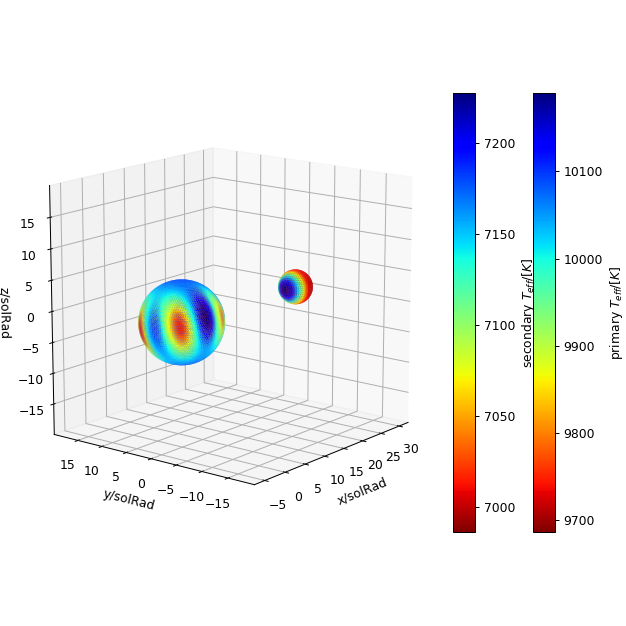

In [9]:
bs.plot.surface(phase=0.15,
                colormap='temperature',
                axis_unit=u.solRad,
                inclination=60
               )